In [789]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary

In [790]:
data = load_wine()
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [791]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [792]:
# there are
X = data.data
y = data.target


In [793]:

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)


In [794]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)
#plot_predictions(X_train, y_train, X_test, y_test)

(142, 142, 36, 36)

In [795]:
print(f"Train datatype: {X_train.dtype} and shape: {X_train.shape}")
print(f"Test Datatype: {X_test.dtype} and shape: {X_test.shape}")
X_train[:5], y_train[:5]


Train datatype: torch.float32 and shape: torch.Size([142, 13])
Test Datatype: torch.float32 and shape: torch.Size([36, 13])


(tensor([[1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
          1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
          6.6000e+02],
         [1.2530e+01, 5.5100e+00, 2.6400e+00, 2.5000e+01, 9.6000e+01, 1.7900e+00,
          6.0000e-01, 6.3000e-01, 1.1000e+00, 5.0000e+00, 8.2000e-01, 1.6900e+00,
          5.1500e+02],
         [1.2370e+01, 1.0700e+00, 2.1000e+00, 1.8500e+01, 8.8000e+01, 3.5200e+00,
          3.7500e+00, 2.4000e-01, 1.9500e+00, 4.5000e+00, 1.0400e+00, 2.7700e+00,
          6.6000e+02],
         [1.3480e+01, 1.6700e+00, 2.6400e+00, 2.2500e+01, 8.9000e+01, 2.6000e+00,
          1.1000e+00, 5.2000e-01, 2.2900e+00, 1.1750e+01, 5.7000e-01, 1.7800e+00,
          6.2000e+02],
         [1.3070e+01, 1.5000e+00, 2.1000e+00, 1.5500e+01, 9.8000e+01, 2.4000e+00,
          2.6400e+00, 2.8000e-01, 1.3700e+00, 3.7000e+00, 1.1800e+00, 2.6900e+00,
          1.0200e+03]]),
 tensor([2., 2., 1., 2., 0.]))

In [796]:
class LoadWineModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_layer=100):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=in_features,
                      out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                      out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                      out_features=out_features)
        )

    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)
        

In [797]:
NUM_CLASSES = 3
IN_FEATURES = len(data.data[0]) 

print(f"Number of features: {IN_FEATURES}")
model = LoadWineModel(IN_FEATURES, NUM_CLASSES)
list(model.state_dict())


Number of features: 13


['linear_layer.0.weight',
 'linear_layer.0.bias',
 'linear_layer.2.weight',
 'linear_layer.2.bias',
 'linear_layer.4.weight',
 'linear_layer.4.bias']

In [798]:
# Since it's a multi classification, we should use CrossEntropyLoss. whic output are logits
# also good to use for unbalance traning data. which we do have. since Samples per class [59,71,48]
loss_fn = nn.CrossEntropyLoss() # note: output already has a softmax activation, no need to add one manually.

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [799]:
torch.manual_seed(42)

In [800]:
def acc(y_pred, y_value):
    true_value = torch.eq(y_pred, y_value).sum().item() # cound how many are the same and return that count
    return true_value*100/len(y_value)

Epoch: 0, Train Acc:40.140845070422536%, Train Loss: 8.489830017089844, Test Acc: 38.888888888888886%, Test Loss: 66.2203369140625
Epoch: 1000, Train Acc:72.53521126760563%, Train Loss: 0.5836037397384644, Test Acc: 80.55555555555556%, Test Loss: 0.5093403458595276
Epoch: 2000, Train Acc:72.53521126760563%, Train Loss: 0.5443542003631592, Test Acc: 83.33333333333333%, Test Loss: 0.493008553981781
Epoch: 3000, Train Acc:74.64788732394366%, Train Loss: 0.49428901076316833, Test Acc: 69.44444444444444%, Test Loss: 0.4941712021827698
Epoch: 4000, Train Acc:73.2394366197183%, Train Loss: 0.5056713223457336, Test Acc: 75.0%, Test Loss: 0.4414122402667999
Epoch: 5000, Train Acc:74.64788732394366%, Train Loss: 0.4533492624759674, Test Acc: 86.11111111111111%, Test Loss: 0.41288432478904724
Epoch: 6000, Train Acc:73.2394366197183%, Train Loss: 0.46330735087394714, Test Acc: 75.0%, Test Loss: 0.394290566444397
Epoch: 7000, Train Acc:80.28169014084507%, Train Loss: 0.40013590455055237, Test Acc: 

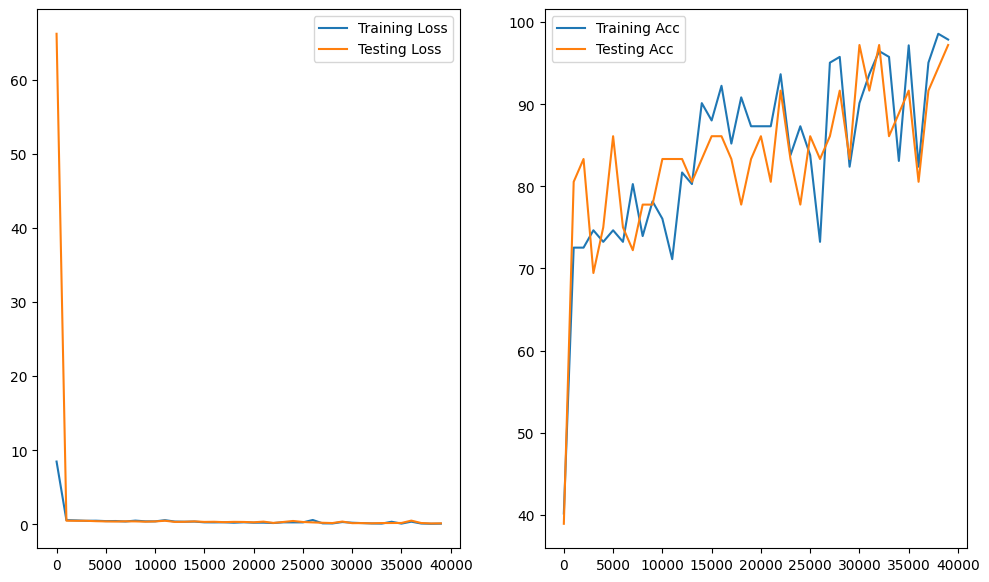

In [801]:
epochs = 40000
training_loss=[]
testing_loss=[]
training_acc=[]
testing_acc=[]
epoch_count=[]

for epoch in range(epochs):
    model.train()

    # 1. do forward pass
    logits = model(X_train)
    # 2. calculate the loss
    train_loss = loss_fn(logits, y_train.type(torch.LongTensor))
    y_pred = logits.argmax(dim=1)
    train_acc = acc(y_pred, y_train)

    # 3. since gradient accumulates, set the gradient to zero on every pass so previous calculation does not affect new one
    optimizer.zero_grad()

    # 4. do backward propagation, which is partial derivative of bhte loss function in respect to the weights and biases
    train_loss.backward()

    # 5. perform gradient descenrt : update weights and bias
    optimizer.step()
        
    # Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor))
        
        test_y_pred = test_logits.argmax(dim=1)

        if epoch % 1000 == 0:
            epoch_count.append(epoch)
            print(f"Epoch: {epoch}, Train Acc:{acc(y_pred, y_train)}%, Train Loss: {train_loss}, Test Acc: {acc(test_y_pred, y_test)}%, Test Loss: {test_loss}")
            training_loss.append(train_loss.numpy())
            testing_loss.append(test_loss.numpy())
            training_acc.append(train_acc)

            test_acc = acc(test_y_pred, y_test)
            testing_acc.append(test_acc)
            
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, label='Training Loss')
plt.plot(epoch_count, testing_loss, label='Testing Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, label='Training Acc')
plt.plot(epoch_count, testing_acc, label='Testing Acc')
plt.legend()
plt.show()